# Problem Statement - SMDM Project - Coded

### Problem 1

### Context
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

### Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description
• age: The age of the individual in years.
• gender: The gender of the individual, categorized as male or female.
• profession: The occupation or profession of the individual.
• marital_status: The marital status of the individual, such as married &, single
• education: The educational qualification of the individual Graduate and Post Graduate
• no_of_dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
• personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
• house_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
• partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
• salary: The individual's salary or income.
• partner_salary: The salary or income of the individual's partner, if applicable.
• Total_salary: The total combined salary of the individual and their partner (if applicable).
• price: The price of a product or service.
make: The type of automobile

Problem 1 - Data Overview
- Import the libraries 

In [211]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

- Load the data

In [212]:
Austo_Automobile = pd.read_csv("austo_automobile.csv")
Austo_Automobile

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


- Check the structure of the data

In [213]:
Austo_Automobile.shape

(1581, 14)

- Check the types of the data

In [214]:
Austo_Automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [215]:
#Creating two different variable one for categorical and other for numerical.
Austo_Automobile_num = Austo_Automobile.select_dtypes(['int64','float64'])
Austo_Automobile_cat = Austo_Automobile.select_dtypes(['object'])

In [216]:
# check for duplication
dups = Austo_Automobile.duplicated()
dups.sum()

0

In [217]:
Austo_Automobile_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1475 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.2 KB


In [218]:
Austo_Automobile_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1528 non-null   object
 1   Profession       1581 non-null   object
 2   Marital_status   1581 non-null   object
 3   Education        1581 non-null   object
 4   Personal_loan    1581 non-null   object
 5   House_loan       1581 non-null   object
 6   Partner_working  1581 non-null   object
 7   Make             1581 non-null   object
dtypes: object(8)
memory usage: 98.9+ KB


- Check for and treat (if needed) missing values 

In [219]:
## checking for missing values
Austo_Automobile.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [220]:
Austo_Automobile['Partner_salary'].describe()

count     1475.000000
mean     20225.559322
std      19573.149277
min          0.000000
25%          0.000000
50%      25600.000000
75%      38300.000000
max      80500.000000
Name: Partner_salary, dtype: float64

In [221]:
#Treat missing values of Partner Salary by replacing with median
Austo_Automobile['Partner_salary'] = Austo_Automobile['Partner_salary'].replace(np.NaN, Austo_Automobile['Partner_salary'].median())

In [222]:
Austo_Automobile.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

In [223]:
Austo_Automobile['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [224]:
Austo_Automobile['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [225]:
#Treat missing values of Gender by replacing with mode
Austo_Automobile['Gender'] = Austo_Automobile['Gender'].replace(np.nan, Austo_Automobile['Gender'].mode()[0])

In [226]:
Austo_Automobile.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

- Check the statistical summary

In [227]:
Austo_Automobile.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20585.895003,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18952.938643,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


- Check for and treat (if needed) data irregularities 

In [228]:
Austo_Automobile['Gender'].unique()

array(['Male', 'Femal', 'Female', 'Femle'], dtype=object)

In [229]:
Austo_Automobile['Gender'].mode()[0]

'Male'

In [230]:
#Treat data irregularties.
Austo_Automobile['Gender'] = Austo_Automobile['Gender'].replace('Femal',Austo_Automobile['Gender'].mode()[0])
#Treat data irregularties.
Austo_Automobile['Gender'] = Austo_Automobile['Gender'].replace('Femle',Austo_Automobile['Gender'].mode()[0])

In [231]:
Austo_Automobile.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [232]:
Austo_Automobile['Gender'].unique()

array(['Male', 'Female'], dtype=object)

- Observations and Insights

#### Observation and Insights.
Data has been loaded correctly into the pandas dataframe

There are 1581 rows and , 14 features

There are missing values in 'Gender', 'Partner_salary' etc. Also the Gender has Femal and Femele incorrect types so have imputed based on mode since gender is a categorical variable.

The Gender Male is categorical and we used mode to derive and use for other variables. Few Gender had nan that was replaced with mode.

The Partner_Salary had 106 missing values that was replaced using median of Partner_Salary. 


#### UNIVARIANT ANLAYSIS

In [233]:
#Numerical
Austo_Automobile_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1475 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.2 KB


In [234]:
Austo_Automobile[['Age', 'No_of_Dependents']].describe()

,Age,No_of_Dependents
count,1581.000000,1581.000000
mean,31.922201,2.457938
std,8.425978,0.943483
min,22.000000,0.000000
25%,25.000000,2.000000
50%,29.000000,2.000000
75%,38.000000,3.000000
max,54.000000,4.000000


<Axes: xlabel='No_of_Dependents'>

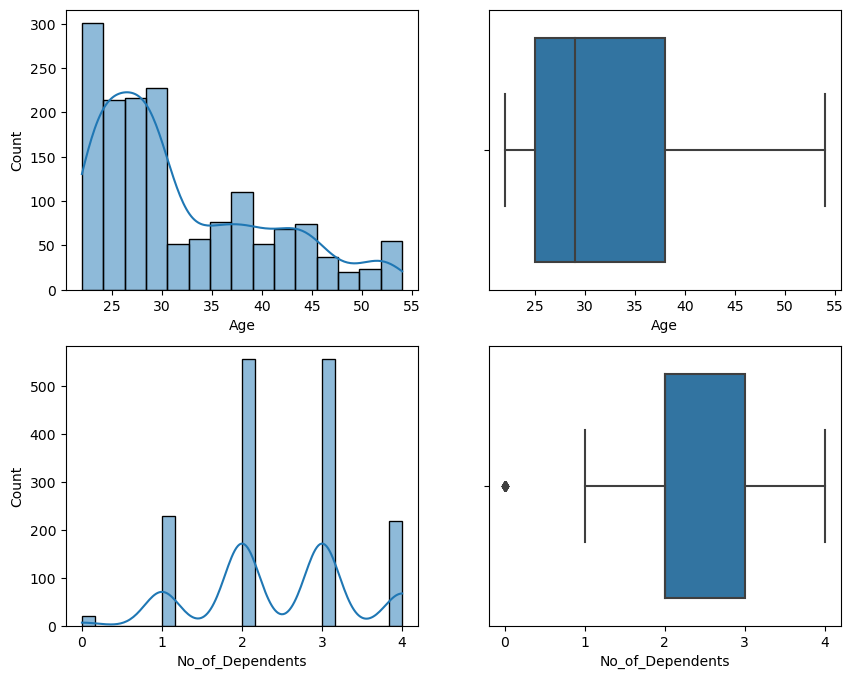

In [235]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,8)
sns.histplot(data=Austo_Automobile, x ='Age', kde=True, ax=axes[0][0])
sns.boxplot(data=Austo_Automobile, x ='Age', ax=axes[0][1])
sns.histplot(data=Austo_Automobile, x='No_of_Dependents', kde=True, ax=axes[1][0])
sns.boxplot(data=Austo_Automobile, x='No_of_Dependents', ax=axes[1][1])

In [236]:
Austo_Automobile[['Partner_salary', 'Total_salary']].describe()

,Partner_salary,Total_salary
count,1581.000000,1581.000000
mean,20585.895003,79625.996205
std,18952.938643,25545.857768
min,0.000000,30000.000000
25%,0.000000,60500.000000
50%,25600.000000,78000.000000
75%,38000.000000,95900.000000
max,80500.000000,171000.000000


<Axes: xlabel='Total_salary'>

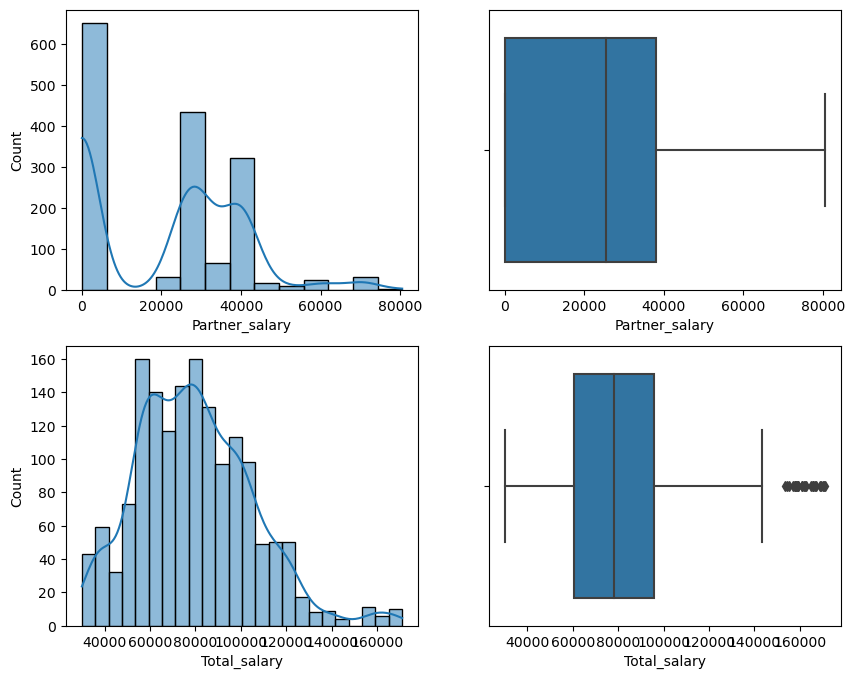

In [237]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,8)
sns.histplot(data=Austo_Automobile, x= 'Partner_salary', kde=True, ax=axes[0][0])
sns.boxplot(data=Austo_Automobile, x= 'Partner_salary', ax=axes[0][1])
sns.histplot(data=Austo_Automobile, x= 'Total_salary', kde=True, ax=axes[1][0])
sns.boxplot(data=Austo_Automobile, x= 'Total_salary', ax=axes[1][1])

In [238]:
Austo_Automobile['Partner_salary'].describe()

count     1581.000000
mean     20585.895003
std      18952.938643
min          0.000000
25%          0.000000
50%      25600.000000
75%      38000.000000
max      80500.000000
Name: Partner_salary, dtype: float64

In [239]:
Austo_Automobile[['Salary', 'Price']].describe()

,Salary,Price
count,1581.000000,1581.000000
mean,60392.220114,35597.722960
std,14674.825044,13633.636545
min,30000.000000,18000.000000
25%,51900.000000,25000.000000
50%,59500.000000,31000.000000
75%,71800.000000,47000.000000
max,99300.000000,70000.000000


<Axes: xlabel='Price'>

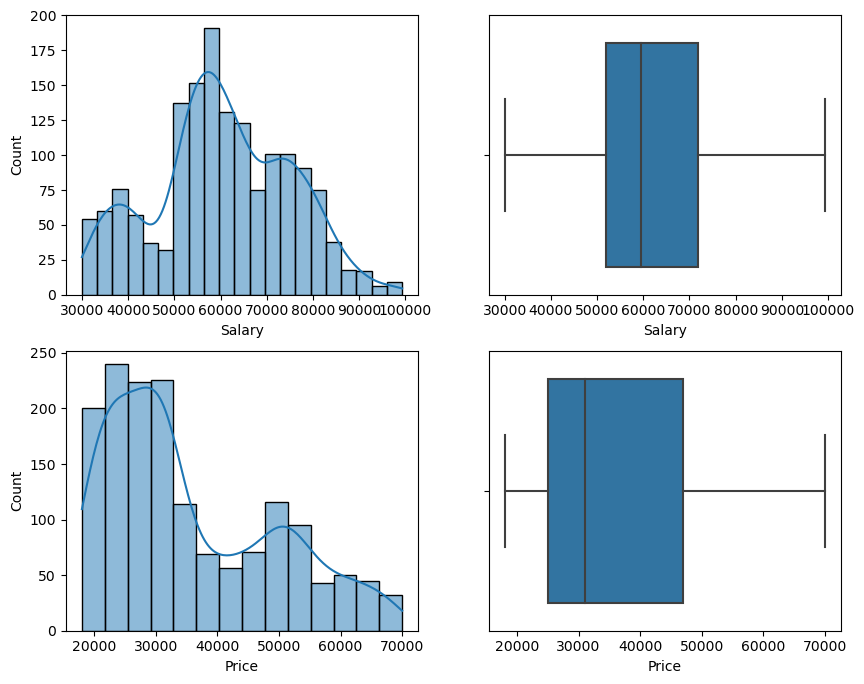

In [240]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,8)
sns.histplot(data=Austo_Automobile, x= 'Salary', kde=True, ax=axes[0][0])
sns.boxplot(data=Austo_Automobile, x= 'Salary', ax=axes[0][1])
sns.histplot(data=Austo_Automobile, x= 'Price', kde=True, ax=axes[1][0])
sns.boxplot(data=Austo_Automobile, x= 'Price', ax=axes[1][1])

Observation and Insights on Numerical variables

No of dependents and Total_Salary have outliners. Price is Right Skewed. Total_Salary is normally distributed.Partner salary does not have q1 value. Its value starts from 0 i.e min.


## Treat the outliners....................

In [241]:
### Method I (Z Score)
Austo_Automobile['No_of_Dependents_zscore'] = ( Austo_Automobile.No_of_Dependents - Austo_Automobile.No_of_Dependents.mean() ) / Austo_Automobile.No_of_Dependents.std()
Austo_Automobile['No_of_Dependents_zscore'].describe()

count    1.581000e+03
mean    -1.438164e-16
std      1.000000e+00
min     -2.605175e+00
25%     -4.853697e-01
50%     -4.853697e-01
75%      5.745329e-01
max      1.634435e+00
Name: No_of_Dependents_zscore, dtype: float64

In [242]:
Austo_Automobile[Austo_Automobile['No_of_Dependents_zscore'] < -2]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,No_of_Dependents_zscore
93,51,Male,Salaried,Single,Post Graduate,0,Yes,No,No,86900,0.0,86900,51000,SUV,-2.605175
128,47,Female,Business,Single,Graduate,0,Yes,No,No,73300,0.0,73300,50000,SUV,-2.605175
138,46,Female,Salaried,Single,Post Graduate,0,Yes,No,No,80200,0.0,80200,49000,SUV,-2.605175
203,44,Male,Salaried,Single,Post Graduate,0,Yes,No,No,68600,0.0,68600,50000,SUV,-2.605175
462,36,Female,Salaried,Single,Post Graduate,0,No,No,No,67500,0.0,67500,55000,SUV,-2.605175
701,30,Male,Business,Single,Post Graduate,0,Yes,No,No,67000,0.0,67000,22000,Hatchback,-2.605175
826,29,Male,Salaried,Single,Post Graduate,0,Yes,Yes,No,62300,25600.0,62300,20000,Hatchback,-2.605175
912,28,Male,Business,Single,Post Graduate,0,Yes,Yes,No,76600,0.0,76600,20000,Hatchback,-2.605175
936,28,Male,Business,Single,Post Graduate,0,No,Yes,No,66300,25600.0,66300,22000,Hatchback,-2.605175
1020,27,Male,Salaried,Single,Post Graduate,0,No,No,No,76000,0.0,76000,23000,Hatchback,-2.605175


In [243]:
Austo_Automobile[Austo_Automobile['No_of_Dependents_zscore']<-2].No_of_Dependents

93      0
128     0
138     0
203     0
462     0
701     0
826     0
912     0
936     0
1020    0
1049    0
1133    0
1220    0
1369    0
1372    0
1374    0
1477    0
1562    0
1567    0
1570    0
Name: No_of_Dependents, dtype: int64

In [244]:
No_of_Dependents_impute_value = (1*Austo_Automobile.No_of_Dependents_zscore.std()) + Austo_Automobile.No_of_Dependents_zscore.mean()
round(No_of_Dependents_impute_value, 2)


1.0

In [245]:
list1 = Austo_Automobile[Austo_Automobile['No_of_Dependents_zscore'] < -2 ].index
list1

Int64Index([  93,  128,  138,  203,  462,  701,  826,  912,  936, 1020, 1049,
            1133, 1220, 1369, 1372, 1374, 1477, 1562, 1567, 1570],
           dtype='int64')

In [246]:
Austo_Automobile['No_of_Dependents'] = np.where(Austo_Automobile.index.isin(list1), round(No_of_Dependents_impute_value,2), 
                                         Austo_Automobile['No_of_Dependents'])

<Axes: xlabel='No_of_Dependents'>

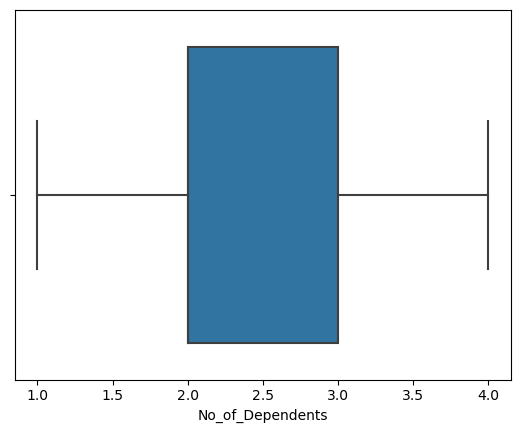

In [247]:
sns.boxplot(x=Austo_Automobile['No_of_Dependents'])

In [248]:
# Method 2 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [249]:
Austo_Automobile['No_of_Dependents_1'] = Austo_Automobile['No_of_Dependents']
Austo_Automobile['No_of_Dependents_1']

0       4.0
1       4.0
2       3.0
3       2.0
4       3.0
       ... 
1576    2.0
1577    4.0
1578    2.0
1579    3.0
1580    4.0
Name: No_of_Dependents_1, Length: 1581, dtype: float64

In [250]:
lr,ur=remove_outlier(Austo_Automobile['No_of_Dependents_1'])
print("lower range",lr, "and upper range", ur)

lower range 0.5 and upper range 4.5


In [251]:
Austo_Automobile['No_of_Dependents_1']=np.where(Austo_Automobile['No_of_Dependents_1']>ur,ur,Austo_Automobile['No_of_Dependents_1'])
Austo_Automobile['No_of_Dependents_1']=np.where(Austo_Automobile['No_of_Dependents_1']<lr,lr,Austo_Automobile['No_of_Dependents_1'])

<Axes: xlabel='No_of_Dependents'>

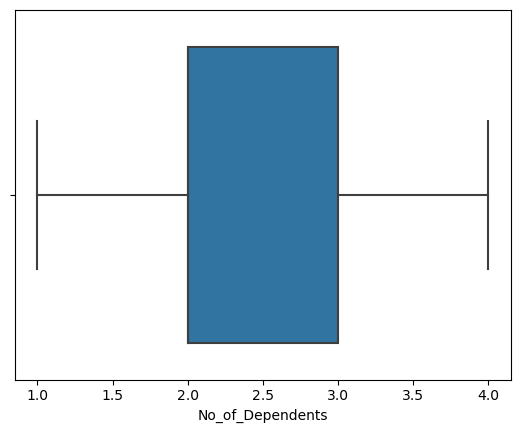

In [253]:
sns.boxplot(x=Austo_Automobile['No_of_Dependents'])

In [254]:
Austo_Automobile['Total_salary_1'] = Austo_Automobile['Total_salary']
Austo_Automobile['Total_salary_1']

0       170000
1       165800
2       158000
3       142800
4       139900
         ...  
1576     33300
1577     32000
1578     32900
1579     32200
1580     31600
Name: Total_salary_1, Length: 1581, dtype: int64

In [255]:
lr,ur=remove_outlier(Austo_Automobile['Total_salary_1'])
print("lower range",lr, "and upper range", ur)

lower range 7400.0 and upper range 149000.0


In [256]:
Austo_Automobile['Total_salary_1']=np.where(Austo_Automobile['Total_salary_1']>ur,ur,Austo_Automobile['Total_salary_1'])
Austo_Automobile['Total_salary_1']=np.where(Austo_Automobile['Total_salary_1']<lr,lr,Austo_Automobile['Total_salary_1'])

<Axes: xlabel='Total_salary_1'>

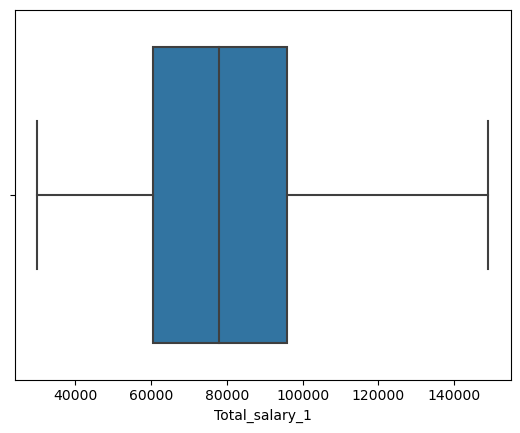

In [257]:
sns.boxplot(x=Austo_Automobile.Total_salary_1)

Categorical variable analysis.

In [258]:
Austo_Automobile_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1528 non-null   object
 1   Profession       1581 non-null   object
 2   Marital_status   1581 non-null   object
 3   Education        1581 non-null   object
 4   Personal_loan    1581 non-null   object
 5   House_loan       1581 non-null   object
 6   Partner_working  1581 non-null   object
 7   Make             1581 non-null   object
dtypes: object(8)
memory usage: 98.9+ KB


In [259]:
Austo_Automobile['Gender'].value_counts()

Male      1254
Female     327
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

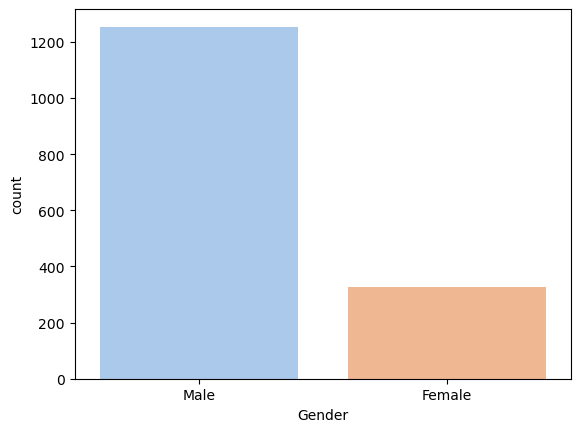

In [260]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='Gender')

In [261]:
Austo_Automobile['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

<Axes: xlabel='Profession', ylabel='count'>

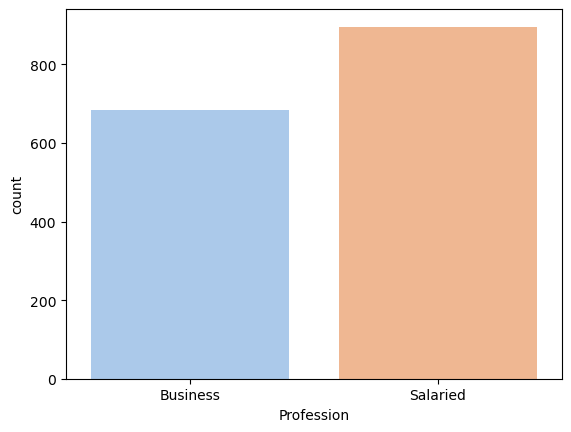

In [262]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='Profession')

In [263]:
Austo_Automobile['Education'].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

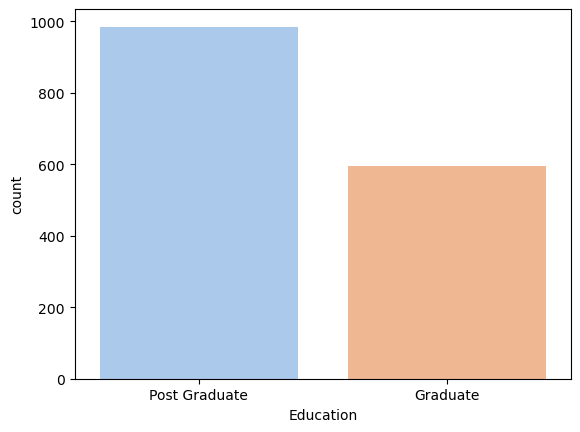

In [264]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='Education')

In [265]:
Austo_Automobile['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

<Axes: xlabel='Marital_status', ylabel='count'>

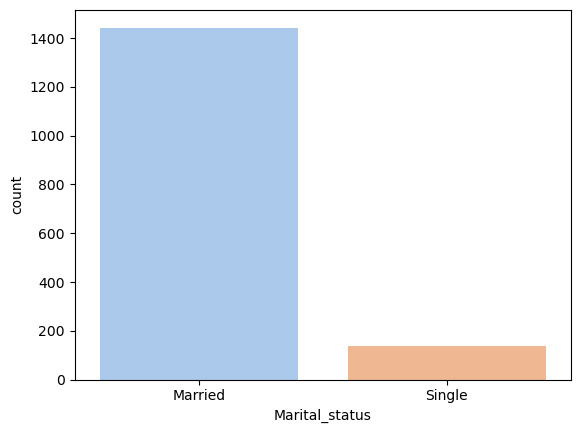

In [266]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='Marital_status')

In [267]:
Austo_Automobile['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

<Axes: xlabel='Personal_loan', ylabel='count'>

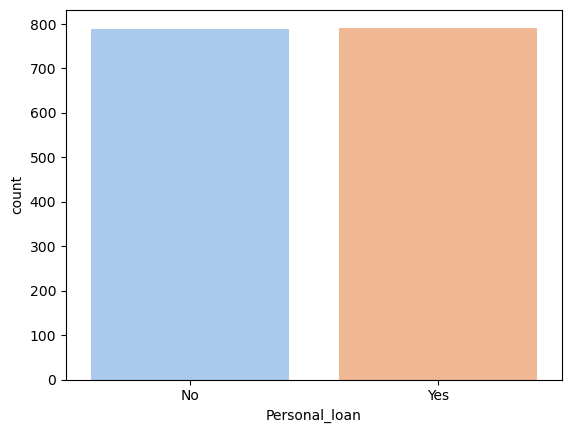

In [268]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='Personal_loan')

In [269]:
Austo_Automobile['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

<Axes: xlabel='Partner_working', ylabel='count'>

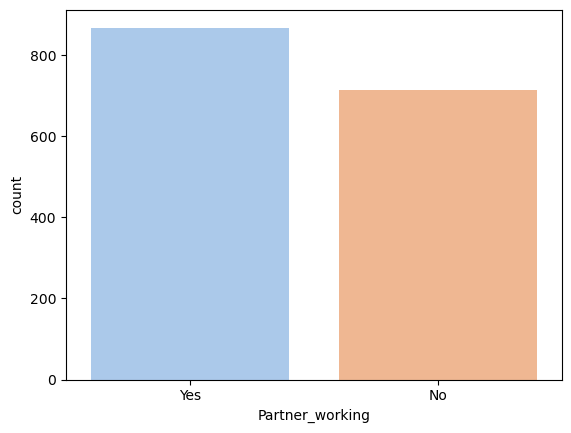

In [270]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='Partner_working')

In [271]:
Austo_Automobile['House_loan'].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

<Axes: xlabel='House_loan', ylabel='count'>

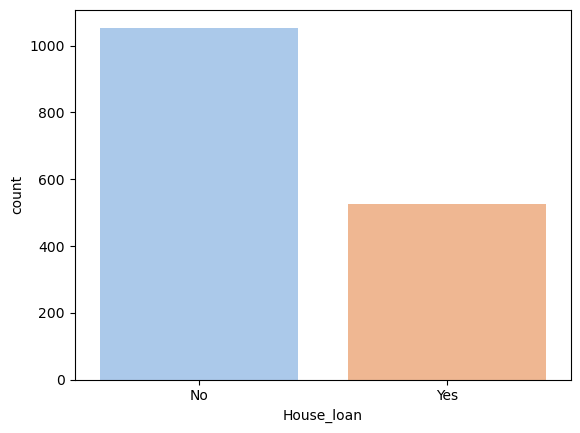

In [272]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='House_loan')

In [273]:
Austo_Automobile['Make'].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

<Axes: xlabel='Make', ylabel='count'>

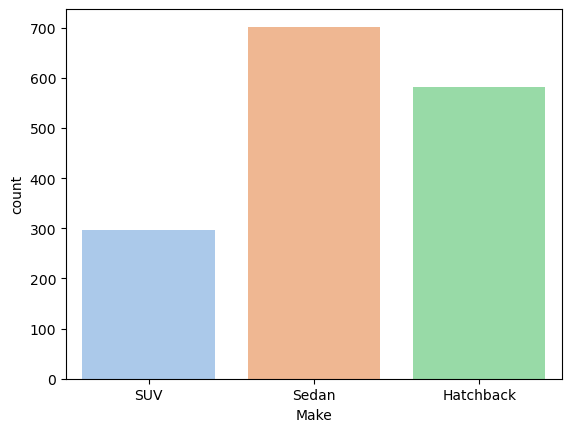

In [274]:
sns.countplot(data=Austo_Automobile, palette='pastel', x='Make')

## Observation and Insights

1200+ are Male categorical variable. 
People prefer Sedan cars compared to Hatchback and SUV.
Around 50% of people have house loans.
There are equal number of people who have opted for personal loans and not opted for personal loans.
868 people have working partner and more than 100% are married.
More number of people are post gradutes and salaried.

### Problem 1 - Key Questions
Explore the data to answer the following key questions: 
    1. Do men tend to prefer SUVs more compared to women? 
    2. What is the likelihood of a salaried person buying a Sedan? 
    3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 
    4. How does the the amount spent on purchasing automobiles vary by gender? 
    5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 
    6. How does having a working partner influence the purchase of higher-priced cars?

<Axes: xlabel='Make', ylabel='count'>

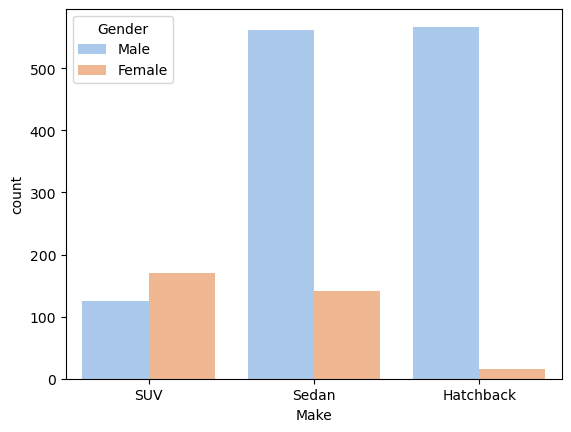

In [275]:
# 1. Do men tend to prefer SUVs more compared to women? 
sns.countplot(data=Austo_Automobile, palette='pastel', x='Make', hue='Gender')

Observation:
    No Female tends to prefer SUV more than men.
    Men prefers sedan and Hatchback

<Axes: xlabel='Profession', ylabel='count'>

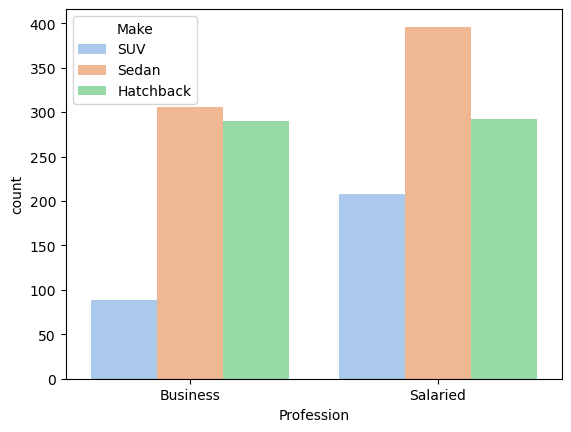

In [276]:
# 2. What is the likelihood of a salaried person buying a Sedan? 
sns.countplot(data=Austo_Automobile, palette='pastel', hue='Make', x='Profession')

Observation
    As seen from above graph the Salaried person are more likey to buy(approx 380) Sedan cars, wheras the Bussiness people around 300 prefer Sedan.

<Axes: xlabel='Make', ylabel='count'>

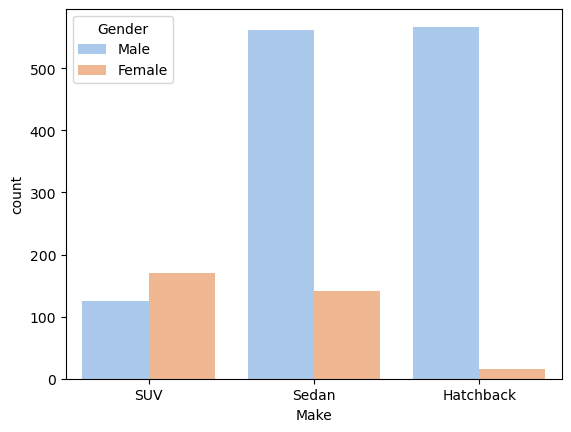

In [361]:
# 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 
sns.countplot(data=Austo_Automobile, palette='pastel', hue='Gender', x='Make')

In [357]:
Austo_Automobile.groupby(['Profession'])['Gender'].value_counts()

Profession  Gender
Business    Male      581
            Female    104
Salaried    Male      673
            Female    223
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='Price'>

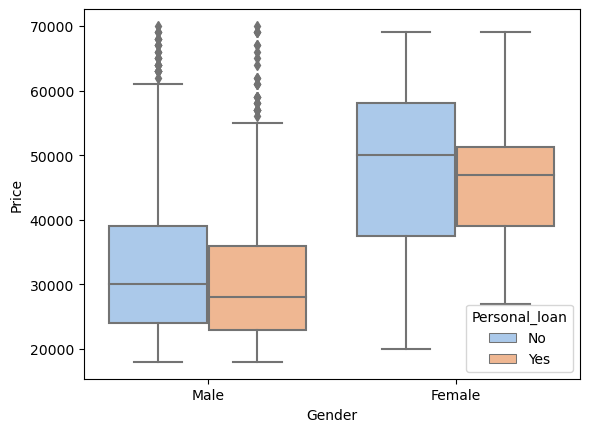

In [342]:
# 4. How does the the amount spent on purchasing automobiles vary by gender? 
sns.boxplot(data=Austo_Automobile, palette='pastel', hue='Personal_loan', x='Gender', y='Price')

Observation:
    From above graph we can see that Male has taken more personal_loan we can derive that automobile purchase is likely done by them.

<Axes: xlabel='Personal_loan', ylabel='count'>

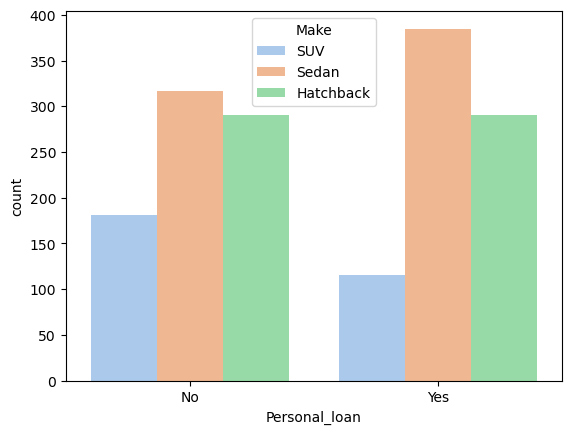

In [329]:
#  5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 
sns.countplot(data=Austo_Automobile, palette='pastel', hue='Make', x='Personal_loan')
# Total : 792

In [324]:
Austo_Automobile['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

<Axes: xlabel='Partner_working', ylabel='Price'>

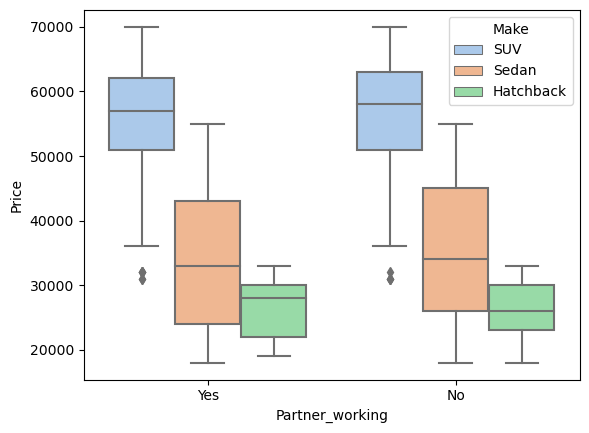

In [330]:
#  6. How does having a working partner influence the purchase of higher-priced cars?
sns.boxplot(data=Austo_Automobile, palette='pastel', hue='Make', x='Partner_working', y='Price')

Observation: From the above graph its noted that Working partners tends to buy more hatchback cars and its not more influenced by working or non working. Median value is more skewed in non working partner compared to working.

### Problem 1 - Bivariate Analysis

In [281]:
Austo_Automobile_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1475 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.2 KB


In [282]:
# Explore the relationship between all numerical variables

<Axes: xlabel='Age', ylabel='No_of_Dependents'>

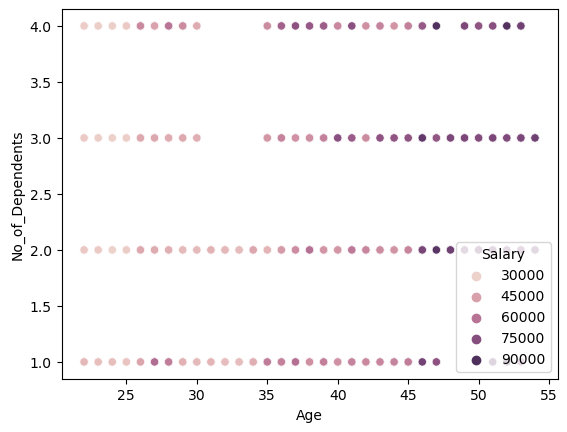

In [283]:
sns.scatterplot(data=Austo_Automobile, x='Age', y='No_of_Dependents', hue='Salary')

<Axes: xlabel='Partner_salary', ylabel='Price'>

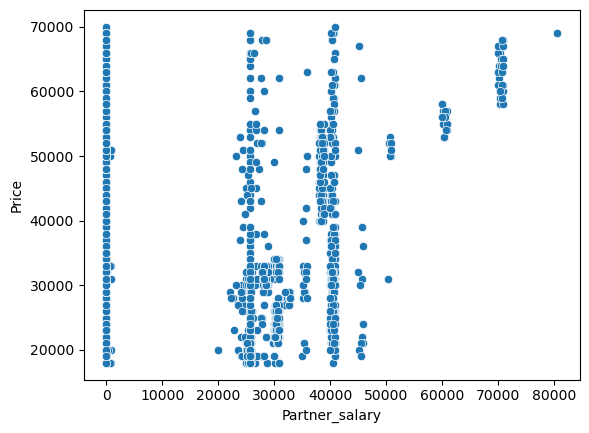

In [284]:
sns.scatterplot(data=Austo_Automobile, x='Partner_salary', y='Price')

<Axes: xlabel='Total_salary', ylabel='Salary'>

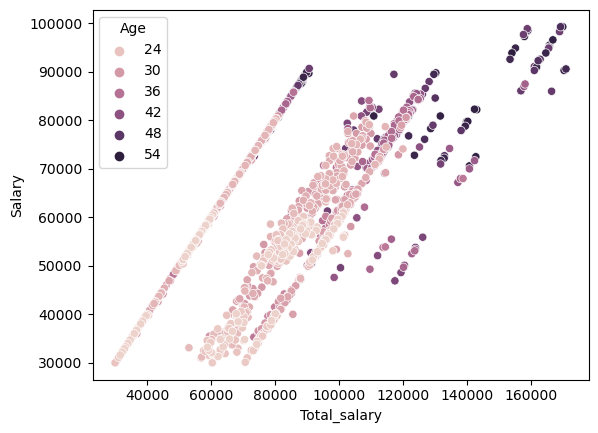

In [285]:
sns.scatterplot(data=Austo_Automobile, x='Total_salary', y='Salary', hue='Age')

In [286]:
#  Explore the correlation between all numerical variables

<Axes: >

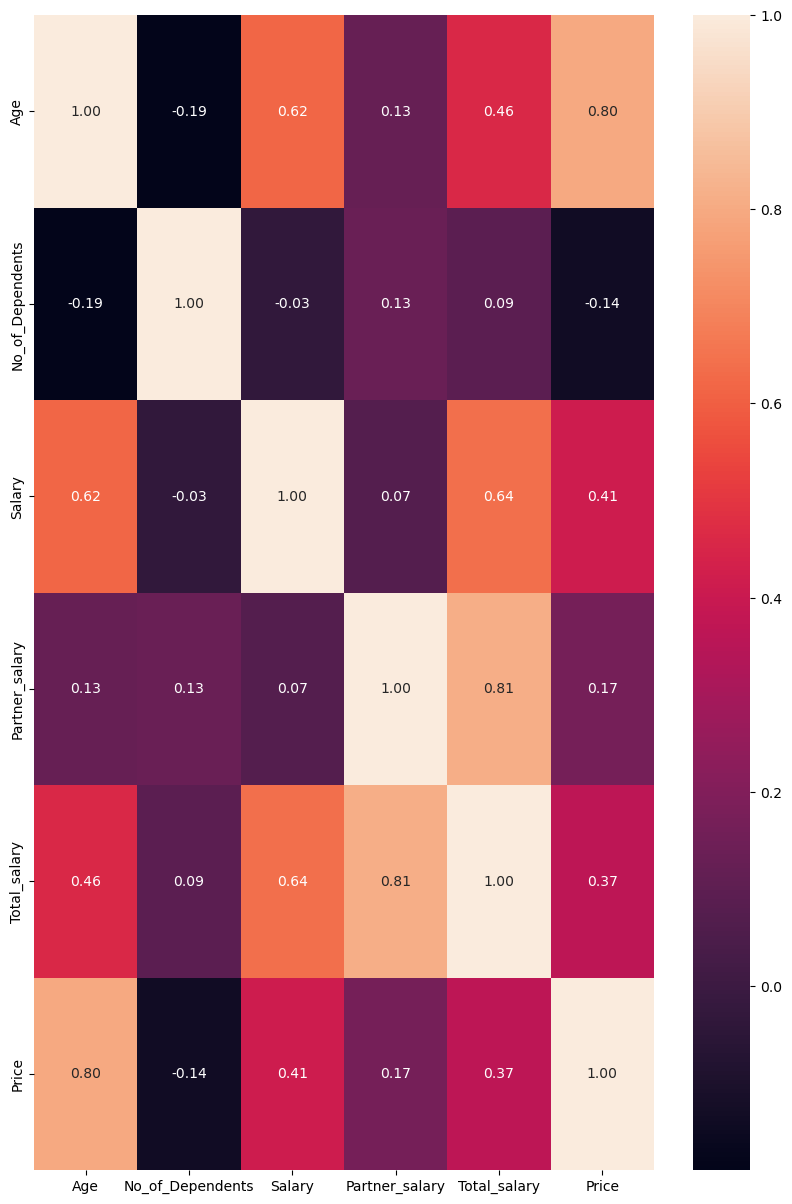

In [287]:
plt.figure(figsize=(10,15))
sns.heatmap(Austo_Automobile_num.corr(), annot=True, fmt='.2f')

In [288]:
# Explore the relationship between categorical vs numerical variables
Austo_Automobile_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1528 non-null   object
 1   Profession       1581 non-null   object
 2   Marital_status   1581 non-null   object
 3   Education        1581 non-null   object
 4   Personal_loan    1581 non-null   object
 5   House_loan       1581 non-null   object
 6   Partner_working  1581 non-null   object
 7   Make             1581 non-null   object
dtypes: object(8)
memory usage: 98.9+ KB


In [289]:
Austo_Automobile_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1475 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.2 KB


<Axes: xlabel='Education', ylabel='Salary'>

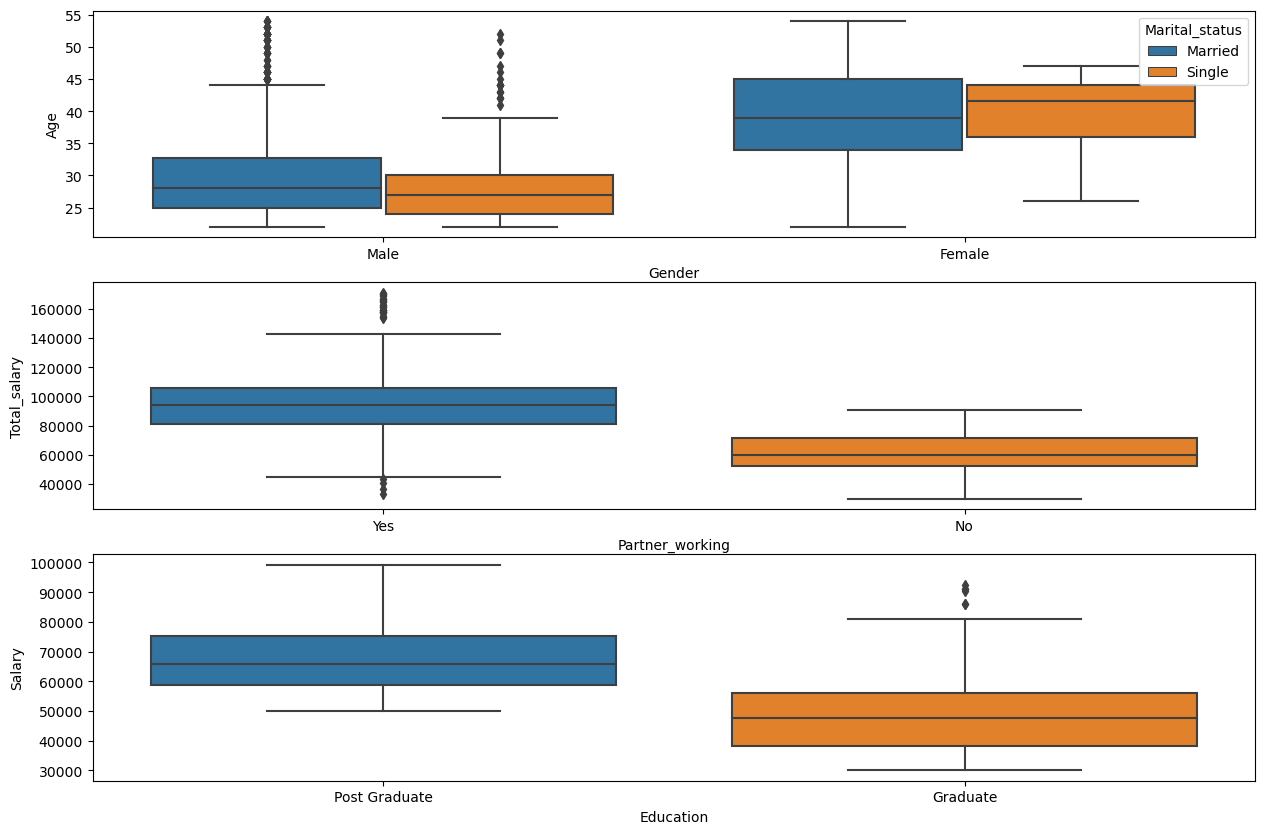

In [290]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15,10)
sns.boxplot(data=Austo_Automobile, x='Gender', y='Age', ax=axes[0], hue='Marital_status')
sns.boxplot(data=Austo_Automobile, x='Partner_working', y='Total_salary', ax=axes[1])
sns.boxplot(data=Austo_Automobile, x='Education', y='Salary', ax=axes[2])


### Problem 1 - Actionable Insights & Recommendations
The spelling in the values of the Gender was given as Femal and Femle.
 
Justification: The Mode is the right treatment for bad data for categorical variable. 
The Gender had some null values.
Justification: Replaced with mode.
Univariant analysis:

On Numerical:
No of dependents and Total_Salary have outliners. Price is Right Skewed. Total_Salary is normally distributed.Partner salary does not have q1 value. Its value starts from 0 i.e min.
The median is not having the correct sized data. Its not normally distributed.
Treatment of Outliners is done by Zscore and other method used is box plot type. 

Categorical variable Analysis:
1200+ are Male categorical variable. People prefer Sedan cars compared to Hatchback and SUV. Around 50% of people have house loans. There are equal number of people who have opted for personal loans and not opted for personal loans. 868 people have working partner and more than 100% are married. More number of people are post graduates and salaried

Recommendations:
The insconsitent numerical variables needs treatment for better results like Gender and Partner salary.According to few analysis the marketing campaign shows some results where bussiness people tend to buy less cars. Recommendation would be to make the price as resonable as possible for the buyers to look for or given a proper data about loans where its affoaradable cost.

### PROBLEM 2

### Context
A bank generates revenue through interest, transaction fees, and financial advice, with interest charged on customer loans being a significant source of profits. GODIGT Bank, a mid-sized private bank, offers various banking products and cross-sells asset products to existing customers through different communication methods. However, the bank is facing high credit card attrition, leading them to reevaluate their credit card policy to ensure customers receive the right card for higher spending and intent, resulting in profitable relationships.

Objective
As a Data Scientist at the company and the Data Science team has shared some data. You are supposed to find the key variables that have a vital impact on the analysis which will help the company to improve the business.

Data Description
userid - Unique bank customer-id
card_no - Masked credit card number
card_bin_no - Credit card IIN number
Issuer - Card network issuer
card_type - Credit card type
card_source_data - Credit card sourcing date
high_networth - Customer category based on their net-worth value (A: High to E: Low)
active_30 - Savings/Current/Salary etc. account activity in last 30 days
active_60 - Savings/Current/Salary etc. account activity in last 60 days
active_90 - Savings/Current/Salary etc. account activity in last 90 days
cc_active30 - Credit Card activity in the last 30 days
cc_active60 - Credit Card activity in the last 60 days
cc_active90 - Credit Card activity in the last 90 days
hotlist_flag - Whether card is hot-listed(Any problem noted on the card)
widget_products - Number of convenience products customer holds (dc, cc, net-banking active, mobile banking active, wallet active, etc.)
engagement_products - Number of investment/loan products the customer holds (FD, RD, Personal loan, auto loan)
annual_income_at_source - Annual income recorded in the credit card application
other_bank_cc_holding - Whether the customer holds another bank credit card
bank_vintage - Vintage with the bank (in months) as on Tthmonth
T+1_month_activity - Whether customer uses credit card in T+1 month (future)
T+2_month_activity - Whether customer uses credit card in T+2 month (future)
T+3_month_activity - Whether customer uses credit card in T+3 month (future)
T+6_month_activity - Whether customer uses credit card in T+6 month (future)
T+12_month_activity - Whether customer uses credit card in T+12 month (future)
Transactor_revolver - Revolver: Customer who carries balances over from one month to the next. Transactor: Customer who pays off their balances in full every month.
avg_spends_l3m - Average credit card spends in last 3 months
Occupation_at_source - Occupation recorded at the time of credit card application
cc_limit - Current credit card limit

Problem 2 - Framing Analytics Problem
Analyse the dataset and list down the top 5 important variables, along with the business justifications.

In [291]:
#Load the file
Godigit_Data = pd.read_excel("godigt_cc_data.xlsx")
Godigit_Data

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000


In [292]:
Godigit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-